In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc, plot_confusion_matrix
from matplotlib import pyplot as plt
from matplotlib import figure
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('downsampled_df.csv')
df_t = pd.read_csv('df_w_dummies.csv')
df_r = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [112]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.4.0
ipykernel        : 6.9.1
ipywidgets       : not installed
jupyter_client   : 7.2.2
jupyter_core     : 4.10.0
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.3.0
notebook         : 6.4.12
qtconsole        : not installed
traitlets        : 5.1.1


In [113]:
!python --version

Python 3.9.12


In [5]:
np.random.seed(69420)

# SMOTE Undersampled then XGBoost

In [6]:
# These are the non-downsampled:
# x2_train, x2_test, y2_train, y2_test = train_test_split

#df_t = df.drop(['nameOrig', 'nameDest', ],axis=1)
df_r = df_r.drop(['nameOrig', 'nameDest'],axis=1)
df_original = df_r
# encode
df_label_encoded = pd.get_dummies(df_original, columns = ['type'])
# create OrigVar and DestVar
df_label_encoded['DestVar'] = df_original['newbalanceDest']- df_original['oldbalanceDest']
df_label_encoded['OrigVar'] = df_original['newbalanceOrig']- df_original['oldbalanceOrg']

In [7]:
df_label_encoded.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
       'DestVar', 'OrigVar'],
      dtype='object')

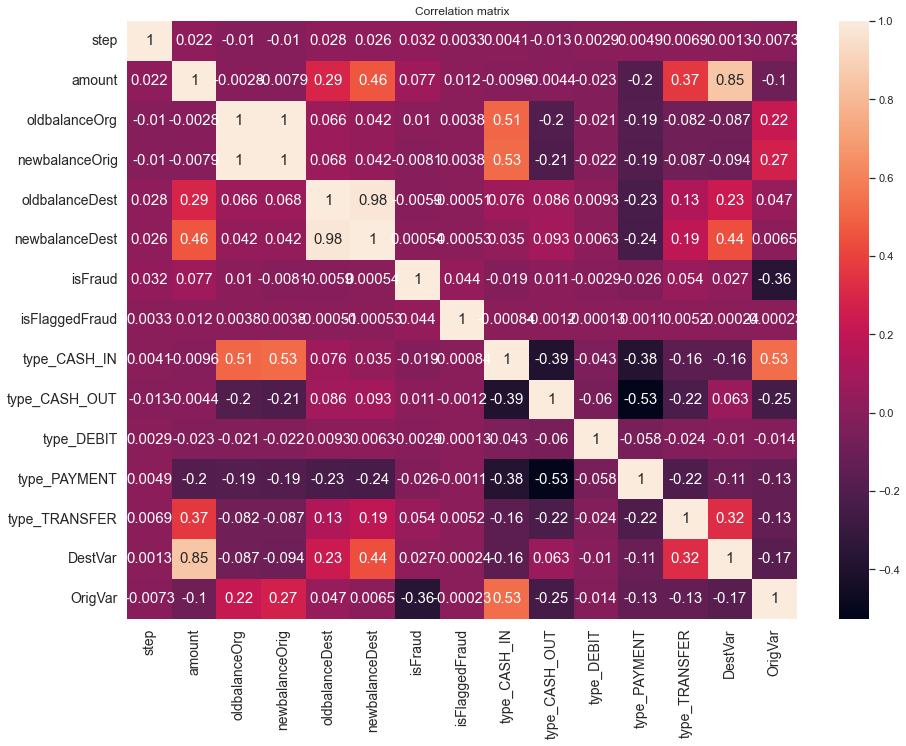

In [8]:
df_label_encoded_corr = df_label_encoded.corr()
sns.set(rc={'figure.figsize':(15,11)})
df_label_encoded_corr_plot = sns.heatmap(df_label_encoded_corr, annot=True, annot_kws={'fontsize': 15,
                                                           'fontfamily': 'sans-serif'
                                                          })
df_label_encoded_corr_plot.set_title('Correlation matrix')
plt.tick_params(labelsize=14)

In [9]:
df_label_encoded = df_label_encoded.drop(['DestVar', 'oldbalanceDest', 'oldbalanceOrg'],axis=1)

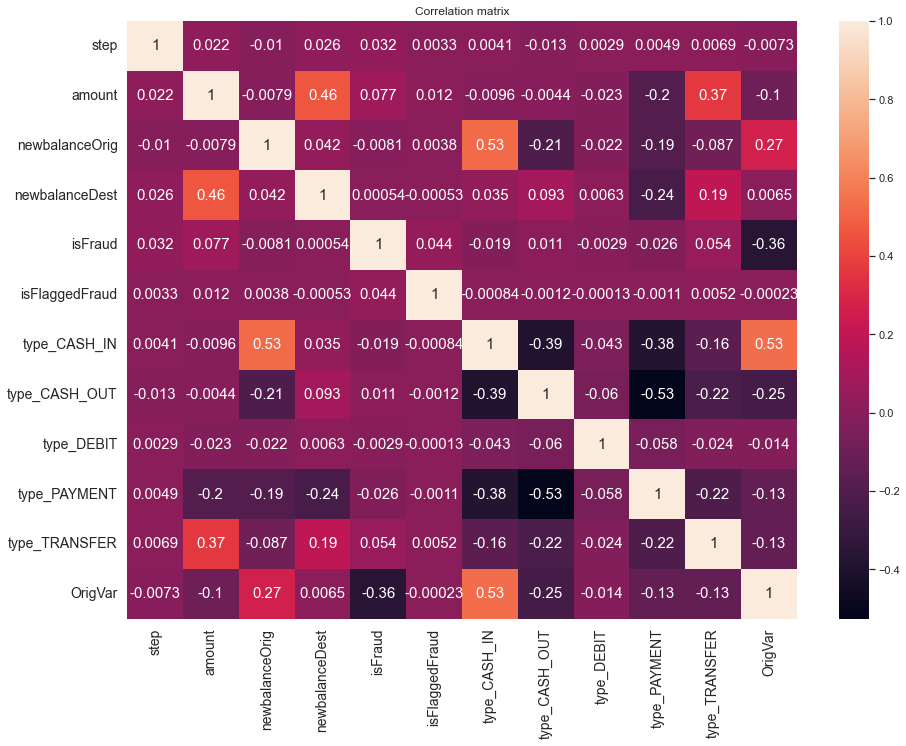

In [10]:
df_label_encoded_corr = df_label_encoded.corr()
sns.set(rc={'figure.figsize':(15,11)})
df_label_encoded_corr_plot = sns.heatmap(df_label_encoded_corr, annot=True, annot_kws={'fontsize': 15,
                                                           'fontfamily': 'sans-serif'
                                                          })
df_label_encoded_corr_plot.set_title('Correlation matrix')
plt.tick_params(labelsize=14)

In [11]:
x5 = df_original.drop(['isFraud'], axis=1)
y5 = df_original['isFraud']


x5_data = x5.values
y5_data = y5.values



x5_train, x5_test, y5_train, y5_test = train_test_split(x5_data,
                                                        y5_data,
                                                        test_size=0.2, 
                                                        random_state=0
                                                       )

In [12]:
x6 = df_label_encoded.drop(['isFraud'], axis=1)
y6 = df_label_encoded['isFraud']


x6_data = x6.values
y6_data = y6.values


x6_train, x6_test, y6_train, y6_test = train_test_split(x6_data,
                                                        y6_data,
                                                        test_size=0.2, 
                                                        random_state=0
                                                       )

In [13]:
x7 = df_label_encoded.drop(['isFraud'], axis=1)
y7 = df_label_encoded['isFraud']

#undersample
undersample = RandomUnderSampler()
x_us, y_us = undersample.fit_resample(x7, y7)

x7_train, x7_test, y7_train, y7_test = train_test_split(x_us,
                                                        y_us,
                                                        test_size=0.2, 
                                                        random_state=0
                                                       )

In [14]:
count_y = Counter(y7_train)
count_y

Counter({1: 6557, 0: 6583})

In [15]:
count_x = Counter(y7_test)
count_x

Counter({1: 1656, 0: 1630})

In [16]:
x_us

,step,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,OrigVar
0,181,76048.21,80455.79,0.00,0,0,0,0,1,0,-76048.21
1,250,161704.67,0.00,691505.28,0,0,1,0,0,0,-50413.00
2,399,180543.87,0.00,384105.05,0,0,1,0,0,0,-383.00
3,215,11740.61,0.00,0.00,0,0,0,0,1,0,0.00
4,306,69852.21,146778.59,637309.60,0,0,1,0,0,0,-69852.21
...,...,...,...,...,...,...,...,...,...,...,...
16421,743,339682.13,0.00,339682.13,0,0,1,0,0,0,-339682.13
16422,743,6311409.28,0.00,0.00,0,0,0,0,0,1,-6311409.28
16423,743,6311409.28,0.00,6379898.11,0,0,1,0,0,0,-6311409.28
16424,743,850002.52,0.00,0.00,0,0,0,0,0,1,-850002.52


In [17]:
x_us.columns

Index(['step', 'amount', 'newbalanceOrig', 'newbalanceDest', 'isFlaggedFraud',
       'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER', 'OrigVar'],
      dtype='object')

In [18]:
y_us

0        0
1        0
2        0
3        0
4        0
        ..
16421    1
16422    1
16423    1
16424    1
16425    1
Name: isFraud, Length: 16426, dtype: int64

In [19]:
# After undersampling
y_us.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [20]:
xgb5=XGBClassifier(random_state=0)
xgb5.fit(x7_train,y7_train)
xg5_pred = xgb5.predict(x7_test)

Precision = True Positives / (True Positives + False Positives)
Recall = True Positives / (True Positives + False Negatives)
Sensitivity = True Positives / (True Positives + False Negatives)


print('\nPrecision: ', tp / (tp + fp))
print('\nSensitivity: ', tp / (tp + fn))
print('\nSpecificity: ', tn / (tn + fp))

In [21]:
cf_m = confusion_matrix(y7_test, xg5_pred)

tp = cf_m[0,0] 
tn = cf_m[1,1]
fp = cf_m[0,1]
fn = cf_m[1,0]

accuracy= round(accuracy_score(y_true=y7_test, y_pred=xg5_pred), 4)
precision = round((tp / (tp + fp)),4)
sensitivity = round((tp / (tp + fn)),4)
specificity = round((tn / (tn + fp)),4)


In [22]:
print(cf_m, "\n", 
      classification_report(y7_test, xg5_pred), 
      '\nAccuraccy: ', accuracy,
      '\nPrecision: ', precision,
      '\nSensitivity: ', sensitivity,
      '\nSpecificity: ', specificity
     )



[[1618   12]
 [   6 1650]] 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1630
           1       0.99      1.00      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286
 
Accuraccy:  0.9945 
Precision:  0.9926 
Sensitivity:  0.9963 
Specificity:  0.9928


# Plot ROC Curve

In [23]:
fpr, tpr, threshold = roc_curve(y7_test, xg5_pred)

roc_auc = auc(fpr, tpr)

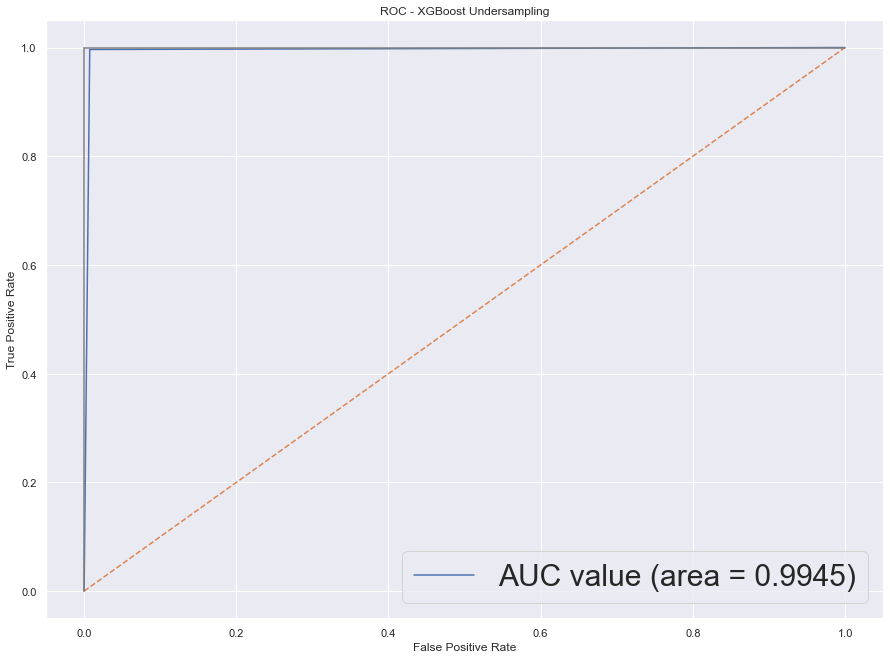

In [24]:
plt.title('ROC - XGBoost Undersampling')
plt.plot(fpr, tpr, label='AUC value (area = %0.4f)' % roc_auc)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".5"), 
plt.plot([1, 1] , c=".5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right", prop={'size': 30})
plt.show()


C:\Users\I313304\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\I313304\AppData\Local\Temp\ipykernel_31788\3246548721.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


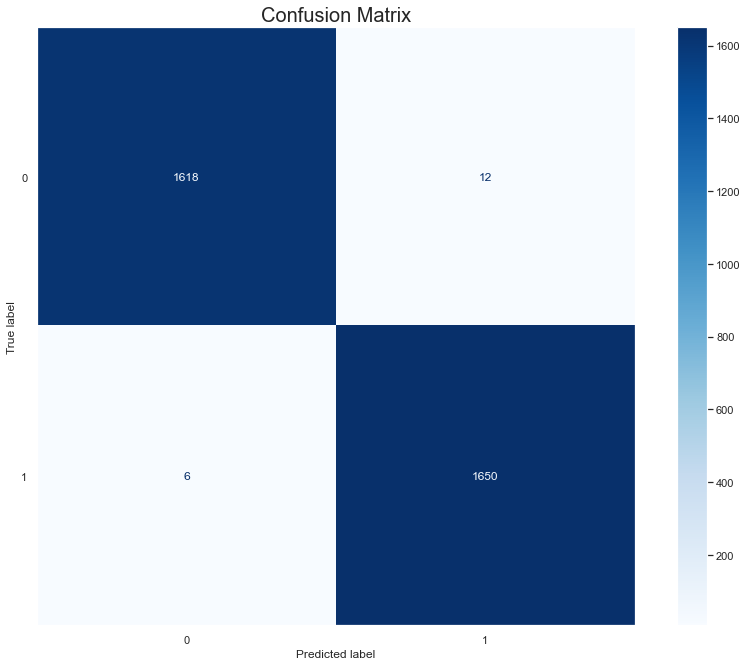

In [25]:
plot_confusion_matrix(xgb5, x7_test, y7_test, cmap=plt.cm.Blues) 
plt.grid(b=None)
plt.rcParams.update({'font.size': 20})
plt.rc('axes', labelsize = 20)
plt.rc('axes', titlesize = 20)
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Feature Importance Plot')

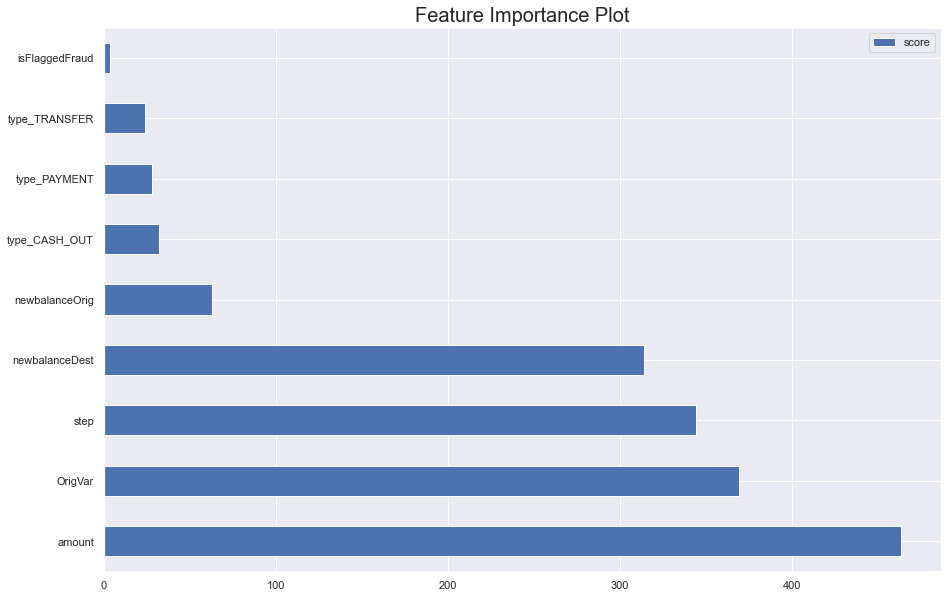

In [26]:
# Feature Importance plot
feature_importance = xgb5.get_booster().get_score(importance_type='weight')
labels = list(feature_importance.keys())
values = list(feature_importance.values())

fi = pd.DataFrame(data=values, index=labels, columns=["score"]).sort_values(by = "score", ascending=False)
fi.nlargest(40, columns="score").plot(kind='barh', figsize = (15,10)) 
plt.title('Feature Importance Plot')

In [27]:

t_type = df_label_encoded["type"].value_counts()
trans = t_type.index
val = t_type.values

fig = px.pie(t_type, values = val, names = trans, hole=0.3, title="Types of transaction")
fig.show()

KeyError: 'type'

In [35]:
df_original = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [36]:
df_fraud = df_original[df_original['isFraud'] == 1]

In [37]:
df_fraud.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [38]:
len(df_fraud)

8213

In [40]:
df_original['amount'].sum()

1144392944759.77

In [39]:
df_fraud['amount'].sum()

12056415427.839998

In [33]:
print('Average Fraudulent Transaction', df_fraud['amount'].sum()/len(df_fraud))

Average Fraudulent Transaction 1467967.299140387


In [41]:
8213 * 1467967

12056412971

In [34]:
print('Average Transaction', df_original['amount'].sum()/len(df_original))

Average Transaction 179861.90354913071


In [59]:
# h = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [69]:
# h_split = np.array_split(h, 6)

In [67]:
# h_split[4]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5090096,355,CASH_OUT,129493.82,C1386423433,496957.00,367463.18,C1136528453,0.00,129493.82,0,0
5090097,355,PAYMENT,5787.63,C1365884506,513408.00,507620.37,M1473495757,0.00,0.00,0,0
5090098,355,CASH_OUT,172499.24,C468847406,150346.00,0.00,C1947417438,0.00,172499.24,0,0
5090099,355,CASH_OUT,377391.01,C1354691509,30759.00,0.00,C1791454133,1409725.39,1697870.91,0,0
5090100,355,PAYMENT,12469.50,C1287195798,315.00,0.00,M87390822,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [70]:
# h_split[0].to_csv('h0.csv', index=True)
# h_split[1].to_csv('h1.csv', index=True)
# h_split[2].to_csv('h2.csv', index=True)
# h_split[3].to_csv('h3.csv', index=True)
# h_split[4].to_csv('h4.csv', index=True)
# h_split[5].to_csv('h5.csv', index=True)

In [84]:
len(h)

6362620